# Medical Use Case : Predicting Cancer type using Health Dataset

- Independant Features:
       'radius_mean','texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'
       
- Target Variable: ' diagnosis ' (Malignant = 0, Benign = 1)
     


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("C:/Users/Abhishek Benjamin/Desktop/Download -2/Statistics/Data Set/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# One Hot Encoding for variable 'diagnosis'

df['diagnosis'] = df['diagnosis'].map({'M':0,'B':1})

In [4]:
# Setting Column 'id' as Index

df.set_index(['id'], inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Missing value check & Null value Imputation

In [5]:
print(df.isnull().sum()/len(df)*100)

diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_worst               0.0
fractal_di

In [6]:
df.rename(columns={'Unnamed: 32':'Unnamed'}, inplace= True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed
id,,,,,,,,,,,,,,,,,,,,,
842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# Dropping column Unnamed

df.drop(['Unnamed'], axis =1, inplace = True)

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
datalabels = df[['radius_mean','texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']] 

names = list(datalabels)

# Bifurcation into Independant & Target Variables

In [10]:
X = df.iloc[:, df.columns != 'diagnosis']
Y = df.iloc[:, df.columns == 'diagnosis']


# Splitting Data into Train & Test Split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20, random_state = 42)

In [12]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
859471,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
873593,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
859196,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
88466802,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
858970,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


In [13]:
# Set the random state for reproducibility

rf_clf = RandomForestClassifier(random_state = 42)

# Hyper-Parameter Optimization using GridSearch CV

In [14]:
np.random.seed(42)


param_dist = {'max_depth':[2,3,4],
              'bootstrap':[True,False],
              'max_features':['auto','sqrt','log2', None],
              'criterion':['gini','entropy']} 

cv_rf = GridSearchCV(rf_clf, cv= 10 , param_grid = param_dist, n_jobs = 3)

cv_rf.fit(x_train, y_train)
print('Best Parameters using Grid search:', cv_rf.best_params_) 


Best Parameters using Grid search: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2'}


In [15]:
# Setting GridSearch CV parameters

rf_clf.set_params(bootstrap=True,
                  criterion='gini',
                  max_depth=3, 
                  max_features='log2')


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

# OOB Rate

- Help us to know optimum number of tress to be present in a Forest

In [16]:
rf_clf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 501

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rf_clf.set_params(n_estimators=i)
    rf_clf.fit(x_train, y_train)

    oob_error = 1 - rf_clf.oob_score_
    error_rate[i] = oob_error

In [17]:
oob_error

0.05274725274725278

In [18]:
# Convert dictionary to a pandas series for easy plotting 

oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 501 trees)')

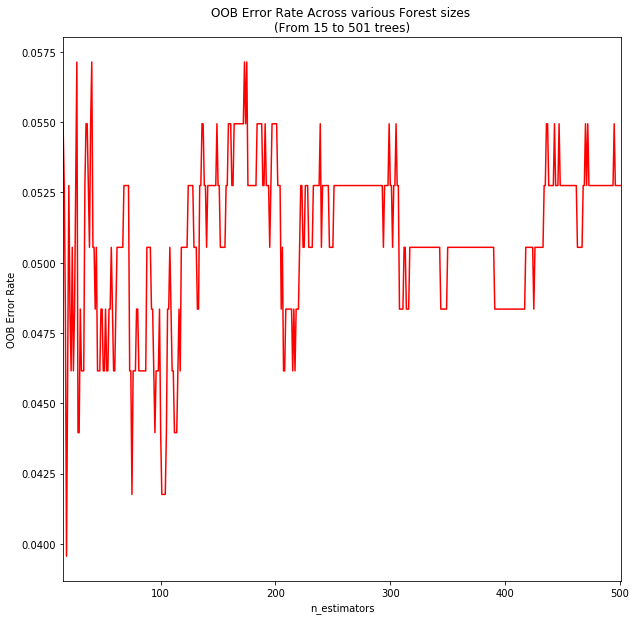

In [19]:
plt.subplots(figsize=(10, 10))
oob_series.plot(kind='line',color = 'red')

plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 501 trees)')

In [20]:
print('OOB Error rate for 300 trees is: {0:.5f}'.format(oob_series[300]))

OOB Error rate for 300 trees is: 0.05275


# Re - training Random Forest

In [21]:
rf_clf= RandomForestClassifier(n_estimators = 300, 
                               bootstrap = True,
                               warm_start=False, 
                               oob_score=False)
rf_clf.fit(x_train, y_train)

rf_clf_train_score = rf_clf.score(x_train, y_train)

y_pred = rf_clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

# Accuracy Score

In [22]:
print("Accuracy Score is: ", accuracy_score(y_test, y_pred)*100)

Accuracy Score is:  96.49122807017544


# Feature Importance

In [23]:
feature_imp = pd.Series(rf_clf.feature_importances_ *100, index = names).sort_values(ascending = False)
feature_imp

concave points_worst       13.394301
area_worst                 13.332097
perimeter_worst            12.325775
concave points_mean        11.419548
radius_worst                6.903916
radius_mean                 5.350025
concavity_mean              5.025459
area_mean                   4.065615
concavity_worst             3.917139
perimeter_mean              3.867972
area_se                     2.456576
texture_worst               2.062765
radius_se                   1.937613
compactness_mean            1.546449
compactness_worst           1.544455
texture_mean                1.525662
smoothness_worst            1.309304
symmetry_worst              1.119239
perimeter_se                0.870078
concavity_se                0.858125
smoothness_mean             0.823933
fractal_dimension_se        0.626812
fractal_dimension_worst     0.585080
compactness_se              0.519157
concave points_se           0.488048
fractal_dimension_mean      0.480088
symmetry_se                 0.456687
t

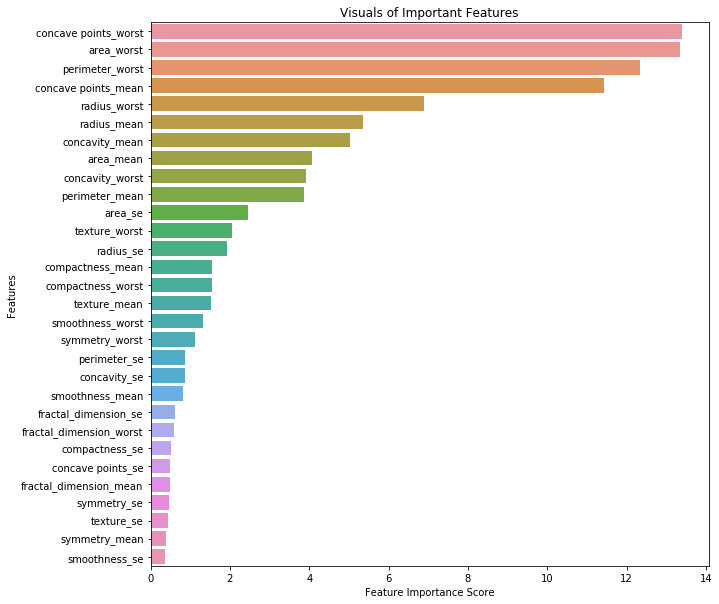

In [24]:
plt.subplots(figsize=(10,10))
sb.barplot(x= feature_imp, y= feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visuals of Important Features')

plt.show()

# Area Under Curve

In [25]:
from sklearn.metrics import roc_curve, auc

In [26]:
predictions_prob = rf_clf.predict_proba(x_test)[:, 1]

fpr_rf, tpr_rf,_ = roc_curve(y_test,
                          predictions_prob,
                          pos_label = 1)

auc_rf = auc(fpr_rf, tpr_rf)

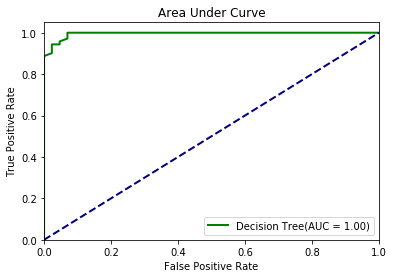

In [27]:
plt.figure(1)
lw = 2
plt.plot(fpr_rf, tpr_rf, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()  